In [52]:
import numpy as np 
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable

In [53]:
def f(x):
    return np.cos(x)

In [54]:
def progonka(lower_line: List[float], middle_line: List[float], upper_line: List[float], right_side: List[float]) -> List[float]:
    a, b, c, d = lower_line.copy(), middle_line.copy(), upper_line.copy(), right_side.copy()
    n = len(a)

    for i in range(1, n):
        k = a[i] / b[i - 1]
        b[i] = b[i] - k * c[i - 1] 
        d[i] = d[i] - k * d[i - 1]

    b[-1] = d[-1] / b[-1] 

    for i in range(n - 2, -1, -1):
        b[i] = (d[i] - c[i] * b[i + 1]) / b[i]

    return b

In [55]:
def solve(f : Callable[[float], float], interval : Tuple[float, float], left_vals: List[float], right_vals: List[float], n = 20): 
    a, b, c = [0], [], []
    l, r = interval
    h = (r - l) / n
    for i in range(1, n):
        a.append(1 / h ** 2)
        b.append(-2 / h ** 2)
        c.append(1 / h ** 2)
    c.append(0)

    grid = [l + i * h for i in range(1, n)]
    d = [f(l + i * h) for i in range(1, n)]

    b.insert(0, left_vals[0])
    c.insert(0, left_vals[1])
    d.insert(0, left_vals[2])

    a.append(right_vals[0])
    b.append(right_vals[1])
    d.append(right_vals[2])
    
    res = progonka(a, b, c, d)
    return res, grid

    


In [56]:
def get_left_vals_as_der(val, interval, n):
    l, r = interval
    h = (r - l) / n 
    return [-1/h, 1/h, val]

def get_left_vals(val, interval, n):
    l, r = interval
    h = (r - l) / n 
    return [1, 0, val]

def get_right_vals_as_der(val, interval, n):
    l, r = interval
    h = (r - l) / n 
    return [-1/h, 1/h, val]

def get_right_vals(val, interval, n):
    l, r = interval
    h = (r - l) / n 
    return [0, 1, val]



\begin{equation*} 
  \begin{cases}
  y^{\prime\prime} = \cos(x) \\
  y(-\frac{\pi}{2}) = 0 \\
  y(\frac{\pi}{2}) = 0 
  \end{cases}
\end{equation*}

solution
$$
y = -cos(x)
$$

[-1.413716694115407, -1.2566370614359172, -1.0995574287564276, -0.9424777960769379, -0.7853981633974483, -0.6283185307179586, -0.47123889803846897, -0.3141592653589793, -0.15707963267948966, 0.0, 0.15707963267948966, 0.3141592653589793, 0.47123889803846897, 0.6283185307179586, 0.7853981633974483, 0.9424777960769379, 1.0995574287564276, 1.2566370614359172, 1.413716694115407]


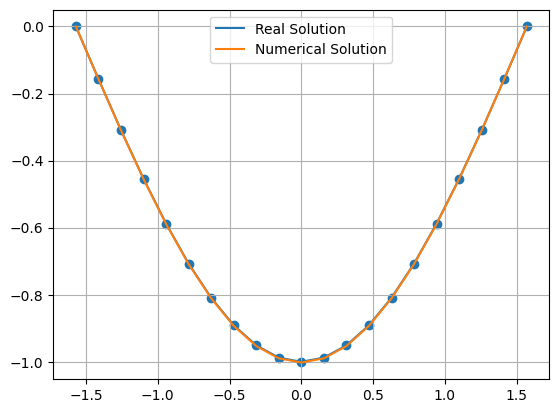

In [57]:
interval = (-np.pi / 2, np.pi / 2)
n = 20

y, x = solve(f, interval, left_vals=get_left_vals(0, interval, n), right_vals=get_right_vals(0, interval, n), n=n)
print(x)

x = [-np.pi / 2] + x + [np.pi / 2]
plt.scatter(x, -np.cos(x))
plt.plot(x, -np.cos(x), label='Real Solution')
plt.plot(x, y, label='Numerical Solution')
plt.legend()
plt.grid(True)
plt.show()



\begin{equation*} 
  \begin{cases}
  y^{\prime\prime} = \cos(x) \\
  y^{\prime}(-\frac{\pi}{2}) = 1 \\
  y(\frac{\pi}{2}) = 2\pi
  \end{cases}
\end{equation*}

solution
$$
y = -cos(x) + 2x + \pi
$$

[-1.413716694115407, -1.2566370614359172, -1.0995574287564276, -0.9424777960769379, -0.7853981633974483, -0.6283185307179586, -0.47123889803846897, -0.3141592653589793, -0.15707963267948966, 0.0, 0.15707963267948966, 0.3141592653589793, 0.47123889803846897, 0.6283185307179586, 0.7853981633974483, 0.9424777960769379, 1.0995574287564276, 1.2566370614359172, 1.413716694115407]


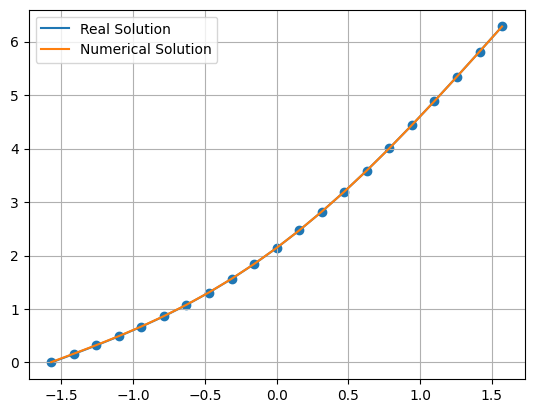

In [58]:
interval = (-np.pi / 2, np.pi / 2)
n = 20

y, x = solve(f, interval, left_vals=get_left_vals_as_der(1, interval, n), right_vals=get_right_vals(2 * np.pi, interval, n), n=n)

print(x)

x = [-np.pi / 2] + x + [np.pi / 2]
plt.scatter(x, [-np.cos(t) + 2 * t + np.pi for t in x])
plt.plot(x, [-np.cos(t) + 2 * t + np.pi for t in x], label='Real Solution')
plt.plot(x, y, label='Numerical Solution')
plt.legend()
plt.grid(True)
plt.show()



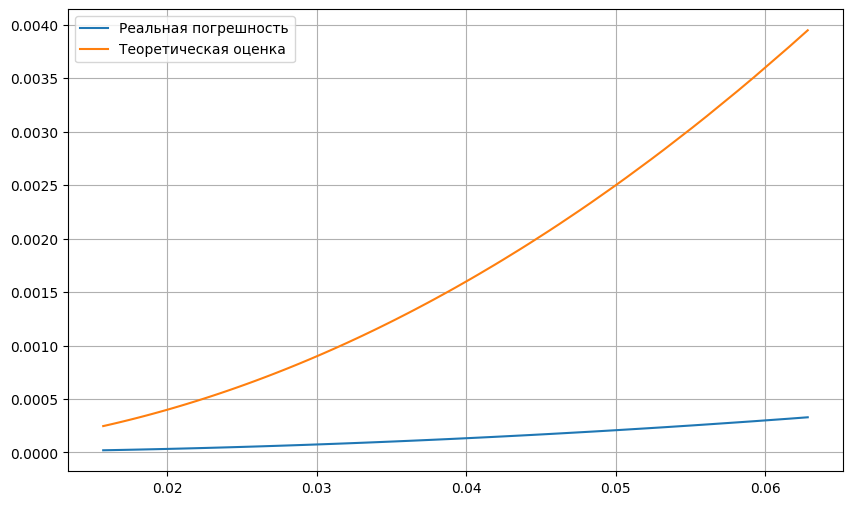

In [83]:
# исследование на порядок сходимости
interval = (-np.pi / 2, np.pi / 2)
values = np.int64(np.linspace(50, 200, num=100))

errors = [] 
h = []
for n in values:
    y, x = solve(f, interval, left_vals=get_left_vals(0, interval, n), right_vals=get_right_vals(0, interval, n), n=n)
    x = [-np.pi / 2] + x + [np.pi / 2]
    expected = -np.cos(x)
    R = np.max(np.abs(np.array(y) - expected))
    errors.append(R)
    h.append(np.pi / n)

plt.figure(figsize=(10, 6))
plt.plot(h, np.power(errors, 1), label="Реальная погрешность")
plt.plot(h, np.power(h, 2), label="Теоретическая оценка")
plt.grid(True) 
plt.legend()
plt.show()




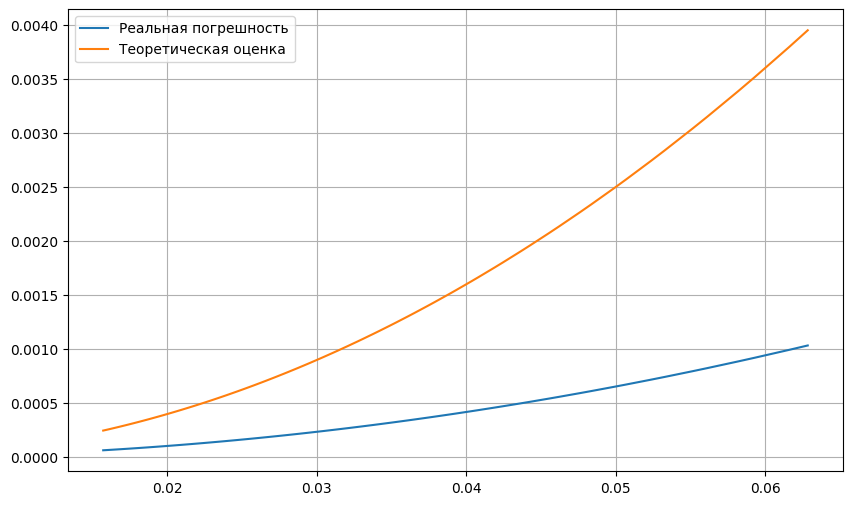

In [84]:
interval = (-np.pi / 2, np.pi / 2)
values = np.int64(np.linspace(50, 200, num=100))

errors = [] 
h = []
for n in values:
    y, x = solve(f, interval, left_vals=get_left_vals_as_der(1, interval, n), right_vals=get_right_vals(2 * np.pi, interval, n), n=n)
    x = [-np.pi / 2] + x + [np.pi / 2]
    expected = [-np.cos(t) + 2 * t + np.pi for t in x]
    R = np.max(np.abs(np.array(y) - expected))
    errors.append(R)
    h.append(np.pi / n)

plt.figure(figsize=(10, 6))
plt.plot(h, np.power(errors, 1), label="Реальная погрешность")
plt.plot(h, np.power(h, 2), label="Теоретическая оценка")
plt.grid(True) 
plt.legend()
plt.show()